In [1]:
import pywt
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.signal import firwin, lfilter
import IPython.display as ipd

In [2]:
def plot_signal(signal, title, xlabel='Sample', ylabel='Amplitude'):
    plt.figure(figsize=(18, 4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


# Демонстрация эффекта фильтрации на примере белого шума

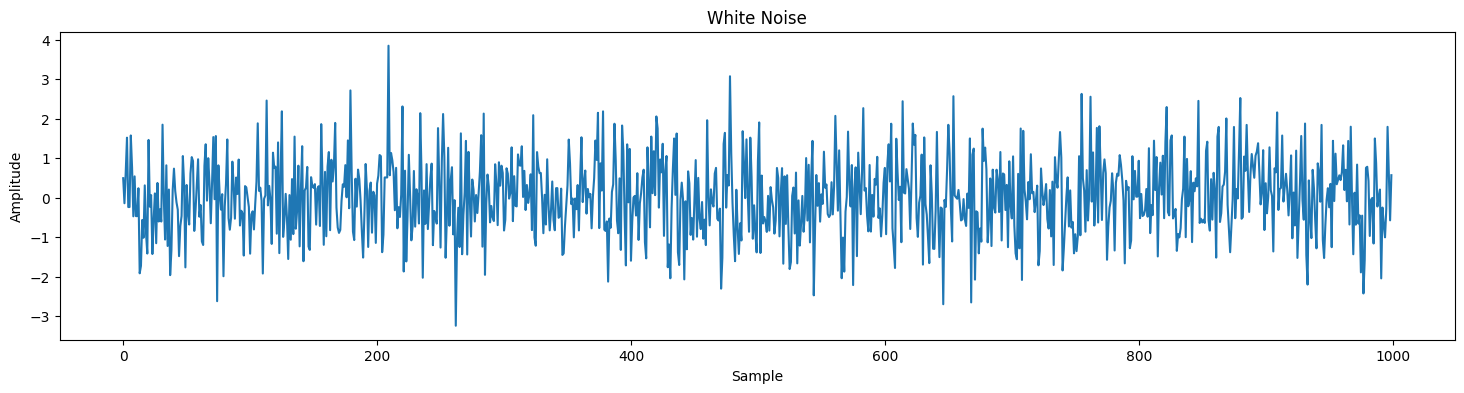

In [3]:
np.random.seed(42)
white_noise = np.random.randn(1000)

plot_signal(white_noise, 'White Noise')


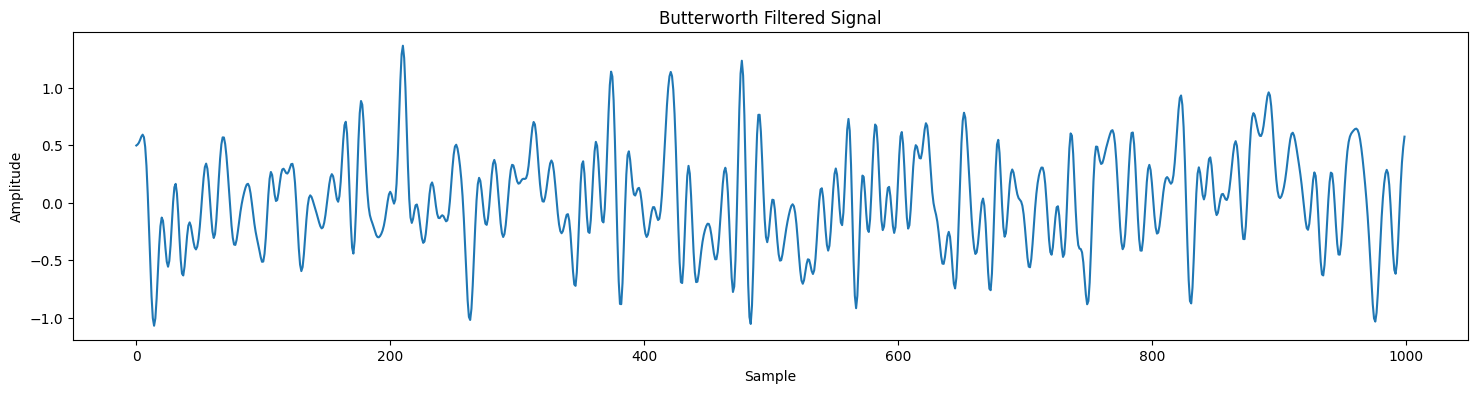

In [4]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

fs = 1000
cutoff = 100
filtered_butterworth = butter_lowpass_filter(white_noise, cutoff, fs)

plot_signal(filtered_butterworth, 'Butterworth Filtered Signal')


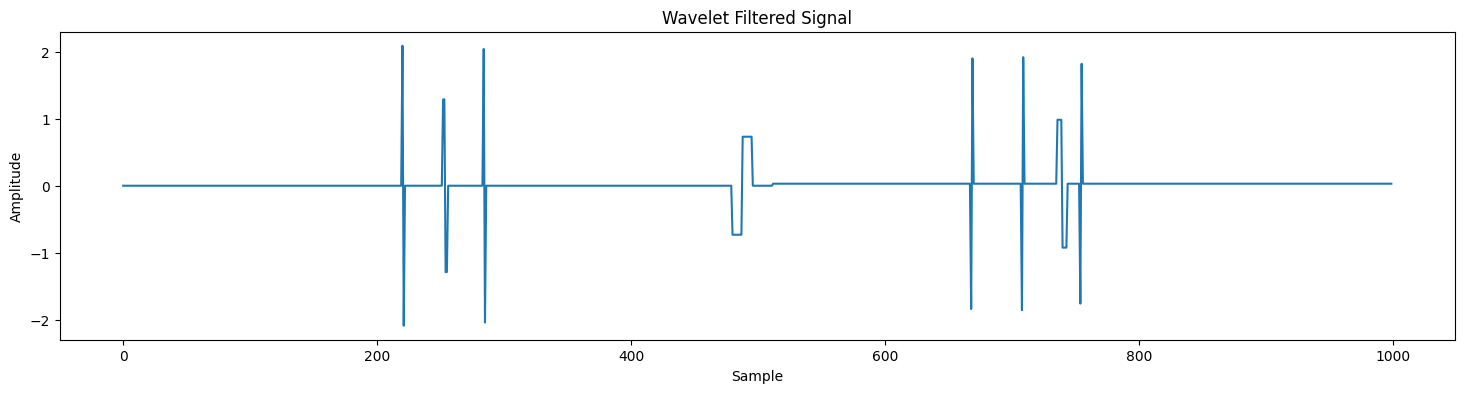

In [5]:
def wavelet_filter(data, wavelet='db1', level=1):
    coeff = pywt.wavedec(data, wavelet, mode="per")
    sigma = np.median(np.abs(coeff[-level:]))
    uthresh = sigma * np.sqrt(2 * np.log(len(data)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    filtered_signal = pywt.waverec(coeff, wavelet, mode='per')
    return filtered_signal

filtered_wavelet = wavelet_filter(white_noise)

plot_signal(filtered_wavelet, 'Wavelet Filtered Signal')


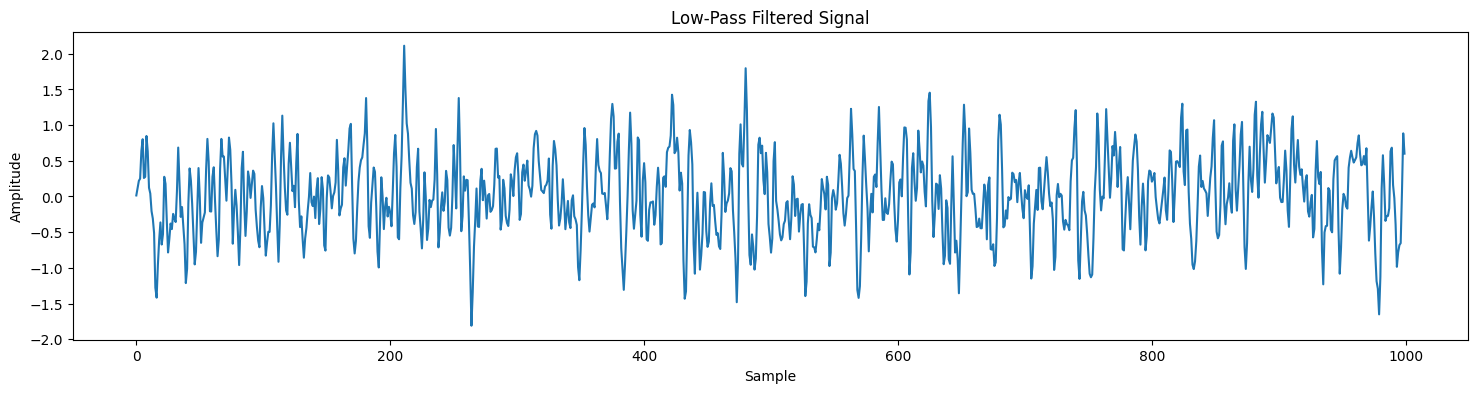

In [6]:
def lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    taps = firwin(order, normal_cutoff)
    filtered_signal = lfilter(taps, 1.0, data)
    return filtered_signal

filtered_lowpass = lowpass_filter(white_noise, cutoff, fs)

plot_signal(filtered_lowpass, 'Low-Pass Filtered Signal')


In [7]:
def load(paths: list) -> list:
        try:
            return [librosa.load(_) for _ in paths]

        except FileNotFoundError:
            raise e
            return

# Применение фильтров к голосу

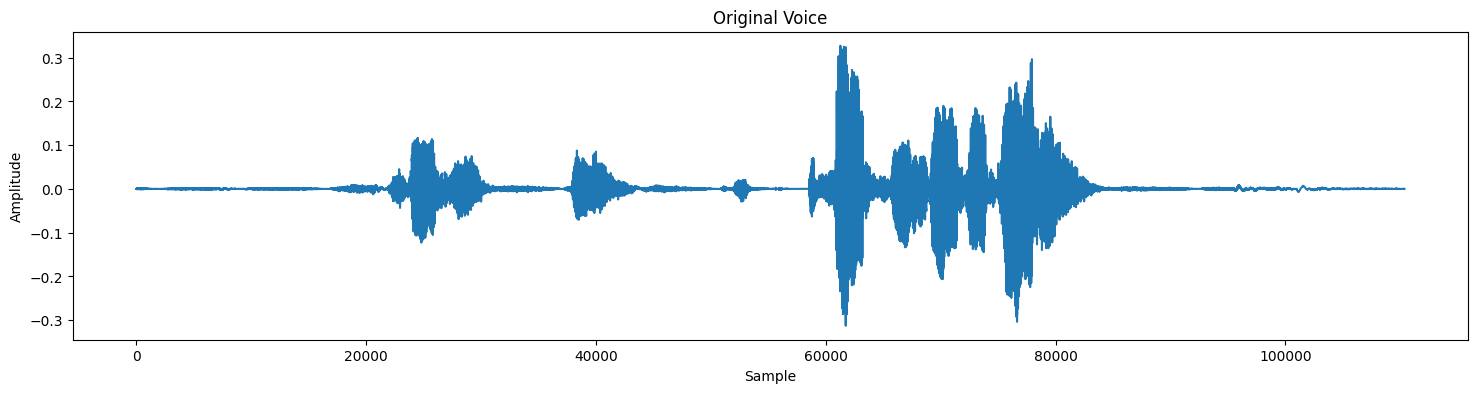

In [8]:
voice, sr = load(['data/03-01-06-02-01-01-01.wav'])[0]
plot_signal(voice, "Original Voice")

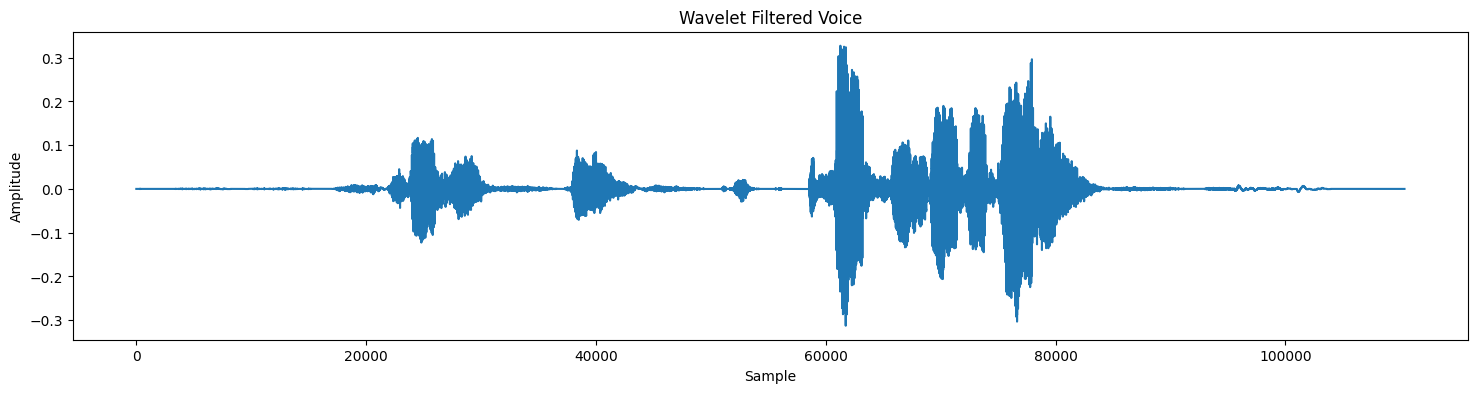

In [9]:
voice_filtered_wavelet = wavelet_filter(voice)

plot_signal(voice_filtered_wavelet, 'Wavelet Filtered Voice')

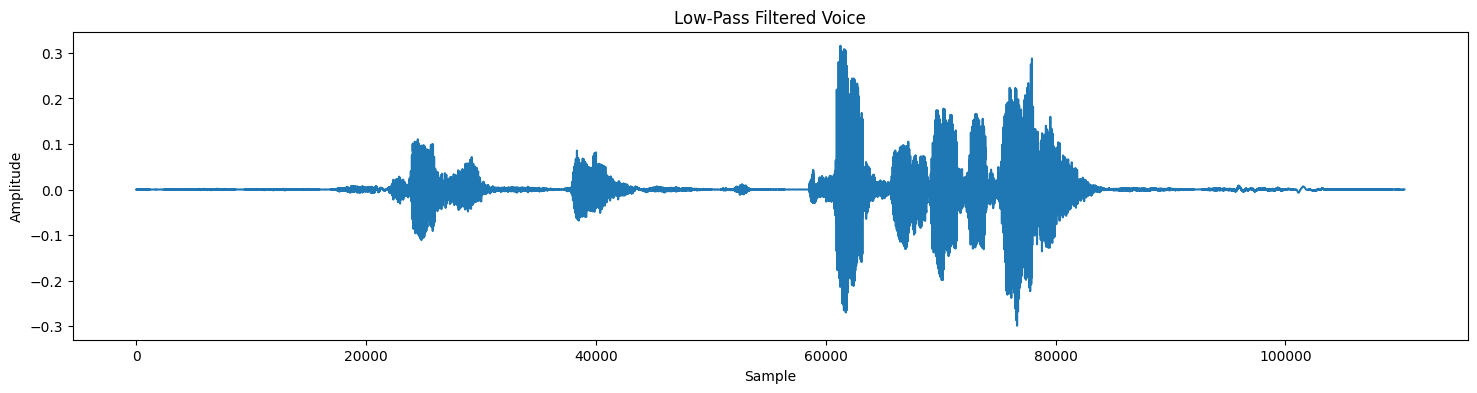

In [10]:
voice_filtered_lowpass = lowpass_filter(voice, cutoff, fs)

plot_signal(voice_filtered_lowpass, 'Low-Pass Filtered Voice')

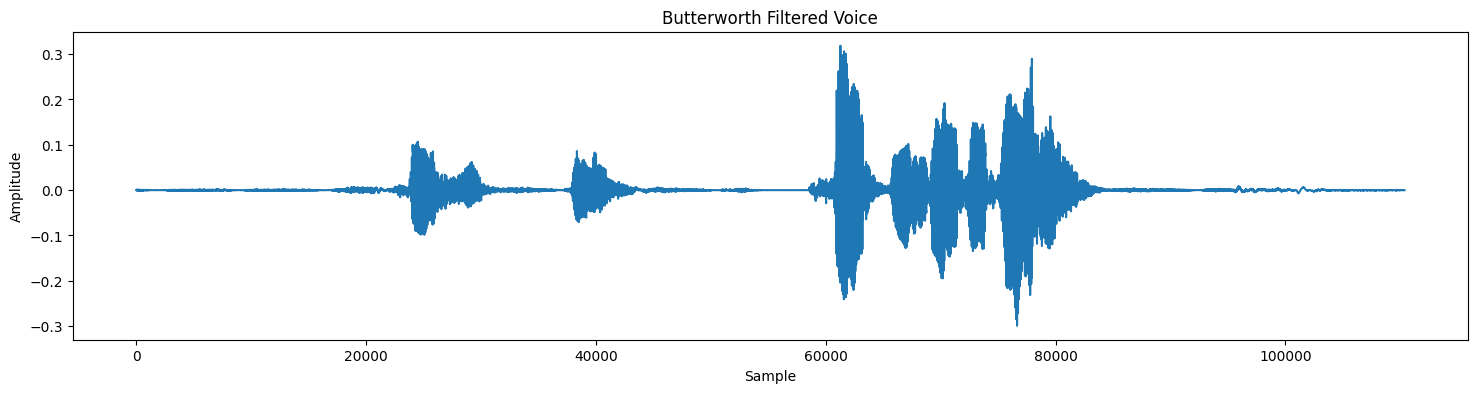

In [11]:
voice_filtered_butterworth = butter_lowpass_filter(voice, cutoff, fs)

plot_signal(voice_filtered_butterworth, 'Butterworth Filtered Voice')

# Сравнение влияния фильтров на голос

In [13]:
ipd.Audio('data/03-01-06-02-01-01-01.wav')

In [14]:
ipd.Audio(voice_filtered_butterworth, rate=sr)

In [15]:
ipd.Audio(voice_filtered_lowpass, rate=sr)

In [16]:
ipd.Audio(voice_filtered_wavelet, rate=sr)